In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib

In [7]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

cols = ['DateTime', 'intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)']

df_select = df_king[cols].dropna()
df_up = df_select[df_select['DateTime'].dt.date ==dt.date(2021,1,24)]
df_down = df_select[df_select['DateTime'].dt.date ==dt.date(2021,1,22)]

In [46]:
def Plot_kakakusaday(df,name,title):
    plt.rcParams['font.size']=20

    spot = df[ 'spot_price(円/kWh)'].values
    intra = df[ 'intra_price(円/kWh)'].values
    gap = df['gap_price[intra-spot](円/kWh)'].values
    xvalues= np.array(range(0,48))/2
    x_tick = np.array(xvalues[::4],dtype=(int))

    fig = plt.figure(figsize=(8,16))
    ax1 = fig.add_subplot(2,1,1)
    plt.title(title,fontname='Times New Roman')
    ax2 = fig.add_subplot(2,1,2)

    ax1.plot(xvalues,spot,label= 'スポット市場価格',marker ='^',color ='black')
    ax1.plot(xvalues,intra,label = '時間前市場価格',marker ='8',color ='black')
    ax1.legend(prop ={'family':'MS Mincho'})
    ax1.set_xticks(x_tick)
    ax1.set_yticks(ax1.get_yticks())
    ax1.set_xticklabels(x_tick,fontname='Times New Roman')
    ax1.set_yticklabels(ax1.get_yticks(),fontname='Times New Roman')


    ax2.plot(xvalues,gap,label= '価格差（時間前市場－スポット市場）',color ='black')
    ax2.legend(prop ={'family':'MS Mincho'})
    ax2.set_xticks(x_tick)
    ax2.set_yticks(ax2.get_yticks())
    ax2.set_xticklabels(x_tick,fontname='Times New Roman')
    ax2.set_yticklabels(ax2.get_yticks(),fontname='Times New Roman')

    ax2.set_xlabel('時刻',fontname='MS Mincho')

    ax1.set_ylabel('Yen / kWh',fontname='Times New Roman')
    ax2.set_ylabel('Yen / kWh',fontname='Times New Roman')

    plt.savefig(f'../../../卒論関連書類/画像/3章画像/分析結果画像/価格差つく日/{name}.png',dpi=500)
    plt.show()




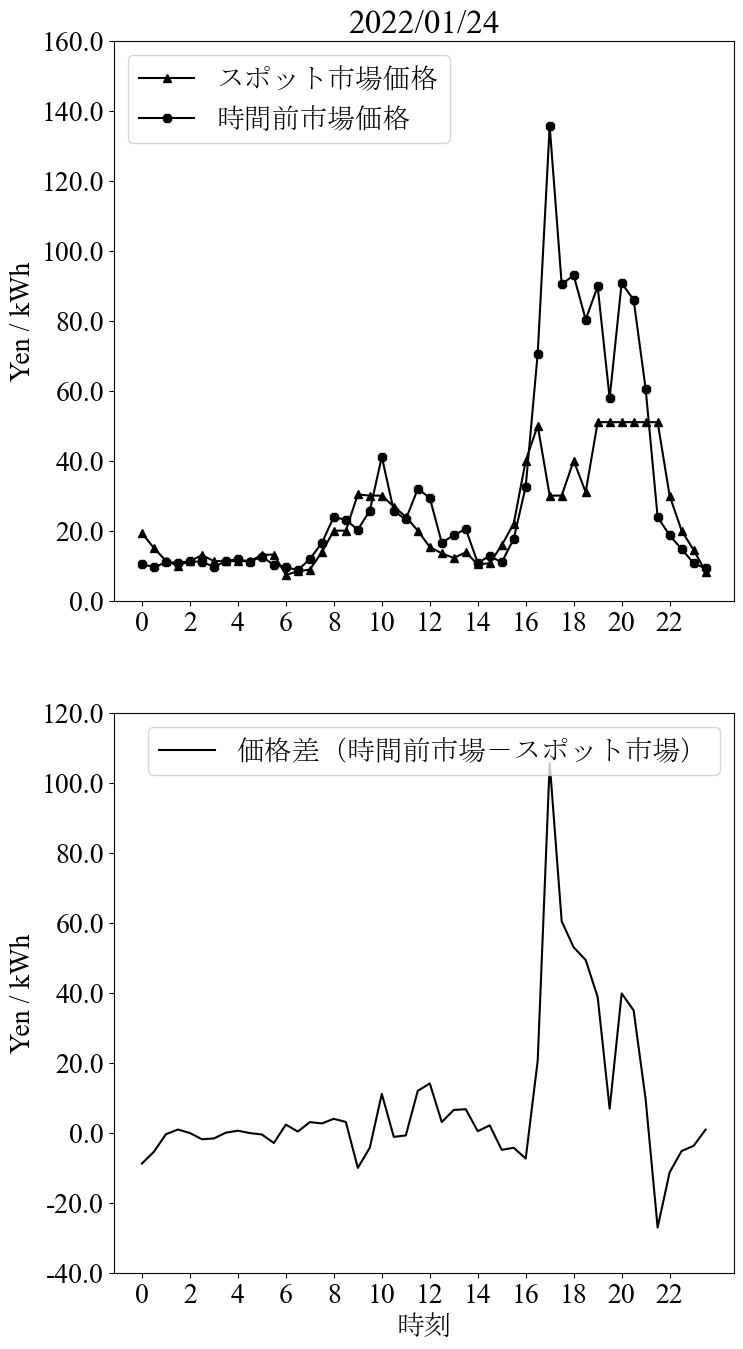

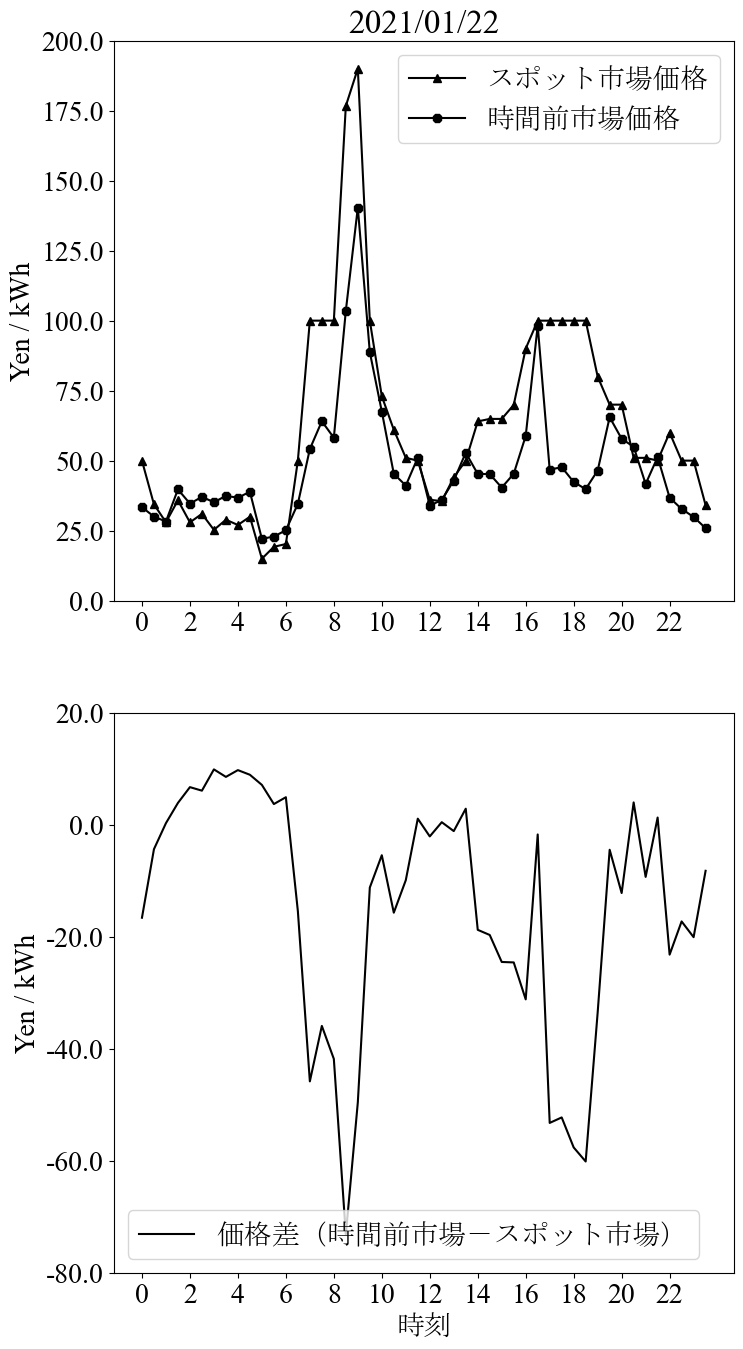

In [47]:
df_up = df_select[df_select['DateTime'].dt.date ==dt.date(2021,1,24)]
df_down = df_select[df_select['DateTime'].dt.date ==dt.date(2021,1,22)]

Plot_kakakusaday(df_up,'up_gap','2022/01/24')
Plot_kakakusaday(df_down,'down_gap','2021/01/22')

In [30]:
np.percentile(df_select['gap_price[intra-spot](円/kWh)'].values,0.01)

-45.612656

In [34]:

df_select[df_select['gap_price[intra-spot](円/kWh)']<=-30]

,DateTime,intra_price(円/kWh),spot_price(円/kWh),gap_price[intra-spot](円/kWh)
49842,2021-01-15 21:00:00,114.69,160.01,-45.32
49844,2021-01-15 22:00:00,88.03,160.01,-71.98
49845,2021-01-15 22:30:00,66.83,131.01,-64.18
49846,2021-01-15 23:00:00,80.35,125.00,-44.65
50102,2021-01-21 07:00:00,159.56,190.00,-30.44
50122,2021-01-21 17:00:00,163.13,200.00,-36.87
50123,2021-01-21 17:30:00,164.48,200.00,-35.52
50124,2021-01-21 18:00:00,139.49,180.00,-40.51
50125,2021-01-21 18:30:00,144.21,180.00,-35.79
50150,2021-01-22 07:00:00,54.16,100.00,-45.84


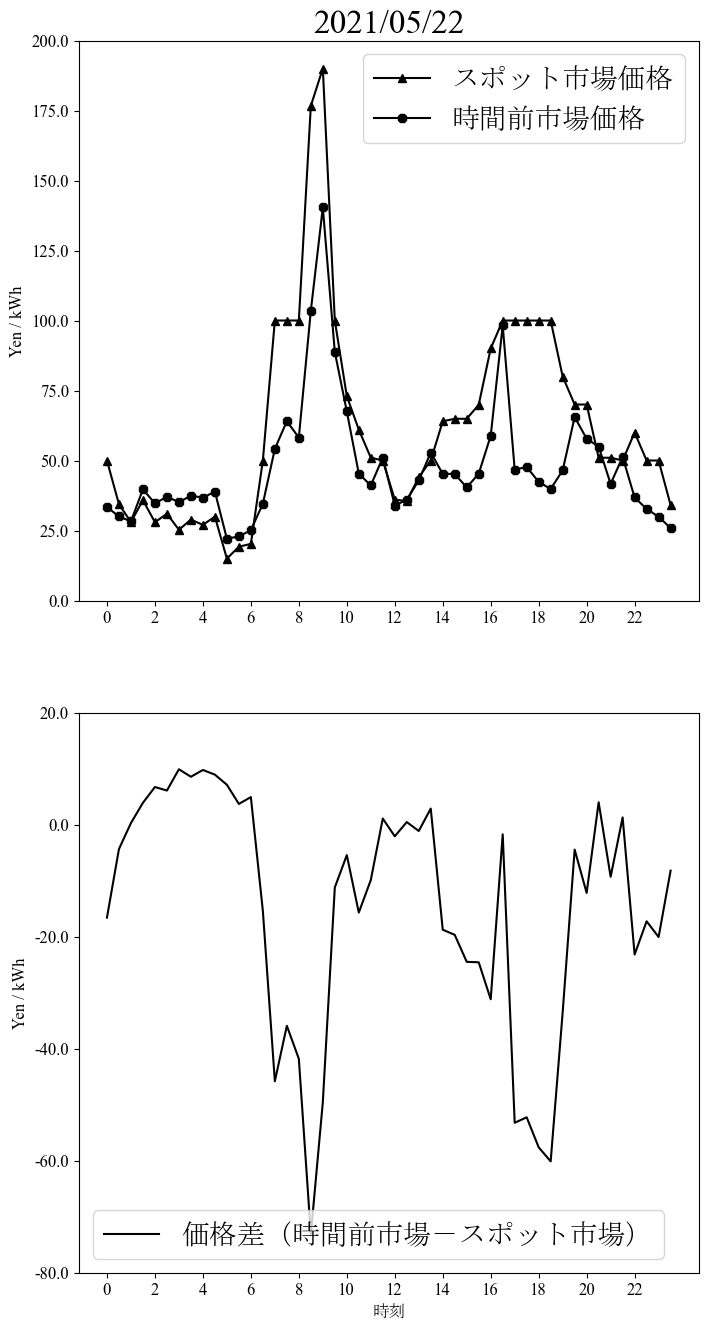

In [16]:
Plot_kakakusaday(df_down,'down_gap','2021/05/22')

In [50]:
spotvolume9 = df_king[(df_king['DateTime'].dt.date >=dt.date(2022,1,31))&(df_king['DateTime'].dt.date <=dt.date(2022,9,30))]['spot_volume(kWh)'].values.sum()
intravolume9 =df_king[(df_king['DateTime'].dt.date >=dt.date(2022,1,31))&(df_king['DateTime'].dt.date <=dt.date(2022,9,30))]['intra_volume（MWh/h）'].values.sum()*1000/2

In [63]:
sell_sum =np.array([822,790,737,655,596,614,710,752,710])
sell_sum = sell_sum.sum()

In [64]:
sell_sum

6386

In [68]:
(spotvolume9)/100000000

2077.210147

In [70]:
(spotvolume9)/sell_sum/100000000

0.32527562590040715

In [59]:
sell_sum

-1350127104

In [93]:
ax1.get_yticks()

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.])

In [ ]:
fig.add_axes()

In [88]:
x_tick = np.array(xvalues[::4],dtype=(int))

In [89]:
x_tick

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

Text(0.5, 1.0, 'プロット')

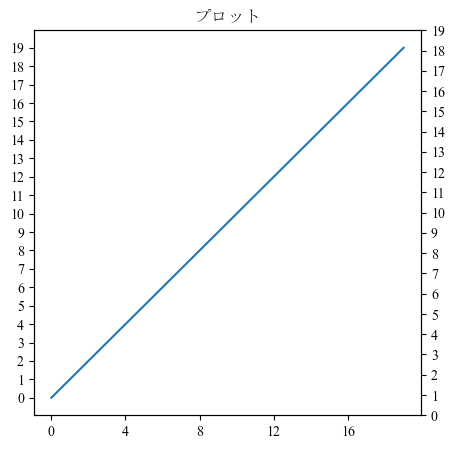

In [35]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.subplots()

ax1.plot(x_,y_)
plt.xticks(list(range(0,20,4)))
plt.yticks(y_)

ax1.set_xticklabels(list(range(0,20,4)),fontname = 'Times New Roman')
ax1.set_yticklabels(y_,fontname ='Times New Roman')


ax2 = ax1.twinx()
ax2.set_yticks(y_)
ax2.set_yticklabels(y_,fontname ='Times New Roman')

plt.title('プロット',fontname='MS Mincho')


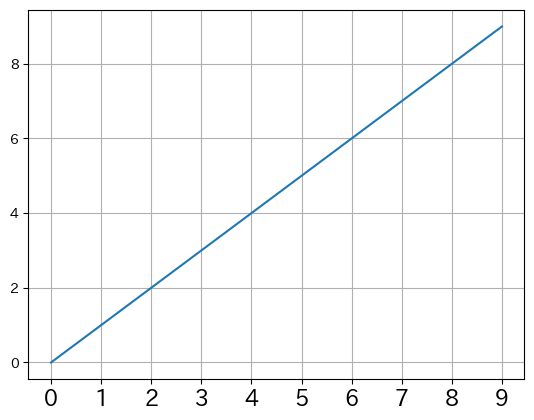

In [20]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

xvalues = np.arange(10)
yvalues = xvalues

fig,ax = plt.subplots()
plt.plot(xvalues, yvalues)
plt.xticks(xvalues)
ax.set_xticklabels(xvalues, fontsize=16)
plt.grid(True)

plt.show()

In [21]:
xvalues

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])